In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Secondhand Car price Prediction.csv")

In [4]:
X=df[['on road old', 'years', 'km', 'rating','condition', 'economy', 'hp', 'torque']]
y=df[ 'current price']

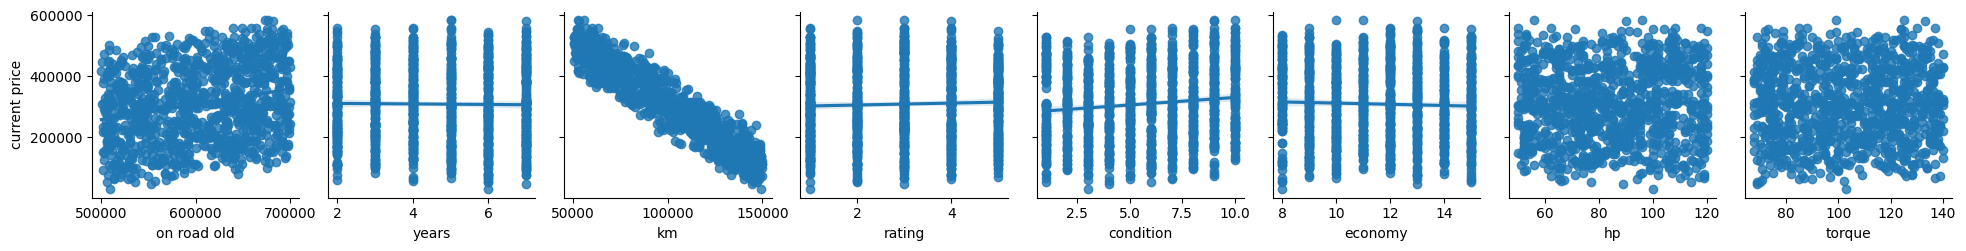

In [5]:
sns.pairplot(data=df,x_vars=['on road old', 'years', 'km', 'rating','condition', 'economy', 'hp', 'torque'],y_vars='current price',kind='reg')

<AxesSubplot: >

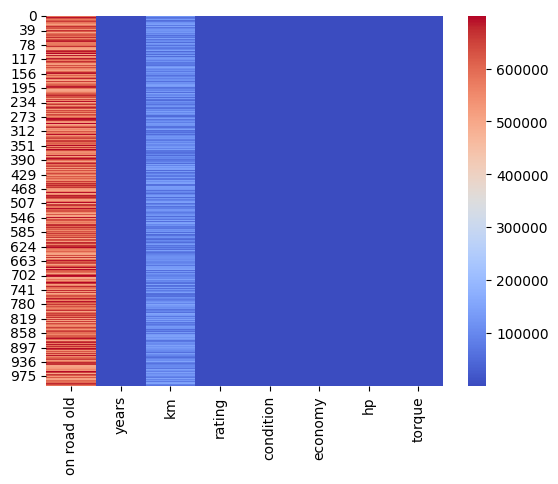

In [6]:
sns.heatmap(X,cmap='coolwarm')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [9]:
reg.intercept_

373000.16021955915

In [10]:
reg.coef_

array([ 5.25199013e-01, -1.88191604e+03, -4.04180618e+00,  4.75752566e+02,
        4.74572874e+03,  3.43311000e+01,  4.61402340e+01,  1.04383889e+01])

In [11]:
y_pred=reg.predict(X_test)
y_pred

array([160400.31511777, 416050.72134139, 431516.64942183, 149110.14770823,
       229079.72699916, 485247.18193347, 242253.05909775, 311037.86571039,
       432467.48138309, 225522.02974566, 460484.8315245 , 414408.47006528,
       216940.66005033, 171981.4001144 , 256903.10969072,  89354.85887649,
       315632.29932346, 331455.11891825,  95619.8495349 , 279691.57158752,
       395779.10750014, 391672.75407683, 307220.95938951, 341041.3930525 ,
       534809.3841221 , 214308.95161228, 139461.55555584, 288219.14185105,
       538623.33624515, 256324.29712921, 112593.82082697, 287828.47857798,
       377684.03532214, 129831.01638043, 172515.773283  , 368736.18994195,
       330206.83335181, 218300.73151945, 318095.85128362, 195170.08325028,
       397953.27171563, 233071.62238953, 231536.95407924, 276984.88124309,
       358123.62728033, 497116.04961473, 164705.58880485, 236973.18312206,
       408873.58651689, 237536.67801794, 272985.91226564, 450628.8608879 ,
       474736.66583117, 1

In [12]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

24771.86702291911

In [13]:
metrics.mean_squared_error(y_test,y_pred)


836216059.7772788

In [14]:
y_train_pred=reg.predict(X_train)
metrics.mean_squared_error(y_train,y_train_pred)

897960547.8180509

In [15]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred) )

28917.400640051983

In [16]:
reg.score(X_test,y_test )

0.9449173030182287

In [17]:
f"{reg.score(X_test,y_test )*100} %"

'94.49173030182287 %'

In [18]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.5)

In [20]:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [23]:
ridge_predictions = ridge.predict(X_test)
lasso_predictions = lasso.predict(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, ridge_predictions)

0.9428483748958781

In [44]:
# Traning loss
mean_squared_error(y_test, ridge_predictions)

900876398.8172369

In [27]:
r2_score(y_test, lasso_predictions)

0.9428479803190382

In [28]:
# Training loss
mean_squared_error(y_test, lasso_predictions)

900882618.4997388

In [33]:
from sklearn.model_selection import cross_val_score
# cross_val_score(ridge, X, y, cv=5)
np.mean(cross_val_score(ridge, X, y, cv=5))

0.9423077166900853

In [34]:
np.mean(cross_val_score(lasso, X, y, cv=5))

0.9423076260268278

In [35]:
np.std(cross_val_score(ridge, X, y, cv=5))

0.0075164484082791165

In [36]:
np.std(cross_val_score(lasso, X, y, cv=5))

0.007516636552306701

In this the Mean of the lasso is greater then Ridge and the Standard Deviation is less then Ridge.
So Lasso is likely to be a better performing model.

In [38]:
from sklearn.linear_model import ElasticNet

# create an ElasticNet object with different regularization strengths
enet = ElasticNet(alpha=0.5, l1_ratio=0.5)

enet.fit(X_train, y_train)

enet_predictions = enet.predict(X_test)
enet_predictions


array([545400.35932578, 237301.2265039 , 190551.80910306, 345165.19793218,
       428085.64637157, 450428.52439472, 483662.62115498, 277069.3502796 ,
       460643.89780218, 228970.13002701, 481837.53594785, 448809.93588308,
       374838.66256941, 149965.54501664, 153159.98507698, 319397.13755601,
       434581.01444828, 148493.59936382, 128628.3215322 , 260895.58594605,
       163757.93785182, 266159.33805782, 498258.65073631, 188481.99527301,
       418647.76755802, 147581.36499264, 320266.31526344, 264605.88554885,
       164719.62709092, 506781.31932232, 227459.31553984, 265728.37870561,
       123326.50384006, 138439.10291497, 202046.45569221, 324726.62837088,
       235162.72874083, 220756.4479693 , 267410.10400431, 275170.62699571,
       404071.39442837, 161053.85367186, 298788.78725057, 202638.6495086 ,
       382236.84179633, 128392.0042821 , 263980.42761375, 258656.78602325,
       377395.82755922, 234796.39231329, 149300.31060353, 454177.9670351 ,
       547459.966101  , 2

In [39]:
r2_score(y_test, enet_predictions)

0.9430983040448868

In [40]:

mean_squared_error(y_test, enet_predictions)

896936786.0536759

In [42]:
np.mean(cross_val_score(enet, X, y, cv=5))

0.942350931326482

In [43]:
np.std(cross_val_score(enet, X, y, cv=5))

0.007417385022146879